# Import Libraries

In [91]:
import cv2
import matplotlib.pyplot as plt

### Read the image using OpenCV

In [92]:
img=cv2.imread("F:\Images\i-am-iron-man-wallpaper-2560x1080_14.jpg")

### Displaying image using OpenCV is not very straight forward. The following command can be used to display the photo.

In [93]:
cv2.imshow("original image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### It is not very convenient when new window opens up every time image has to be displayed and also the new window has to be deleted for further execution of code.

#### To avoid these hassles, we can use pyplot module of matplotlib library to display the image in the Jupyter notebook itself

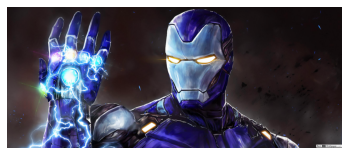

In [94]:
plt.imshow(img)
plt.axis(False)
plt.show()

We can observe that the image displayed using matplotlib is not consistent with the original image.
This is because OpenCV uses BGR color scheme whereas matplotlib uses RGB colors scheme.
We can convert BGR image to RGB by using any of the following methods.

In [95]:
# plt.imshow(img[:,:,::-1])
# plt.axis(False)
# plt.show()

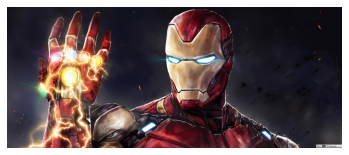

In [96]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.axis(False)
plt.show()

#### Converting a photo to pencil sketch involves the following steps:

1) Convert to Grey Image

In [97]:
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

2) Invert Image

In [98]:
invert_img=cv2.bitwise_not(grey_img)

3) Blur image

Apply Gaussian blur to the image. The second argument to the function is the kernel size, if should be a pair of odd numbers.


In [99]:
blur_img=cv2.GaussianBlur(invert_img, (111,111),0)

4) Invert Blurred Image

In [100]:
invblur_img=cv2.bitwise_not(blur_img)

5) Sketch

#### The sketch can be obtained by performing bit-wise division between the grayscale image and the inverted-blurred image.

In [101]:
sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)

6) Display sketch

In [102]:
cv2.imshow("sketch image",sketch_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Original Image vs Sketch

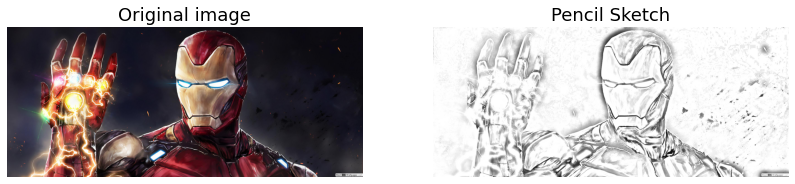

In [103]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title('Original image', size=18)
plt.imshow(RGB_img)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Pencil Sketch', size=18)
rgb_sketch=cv2.cvtColor(sketch_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_sketch)
plt.axis('off')
plt.show()